In [1]:
import os
import time
import json
import joblib
import datetime

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

np.random.seed(42)

In [2]:
CONFIG = {
    'timestamp'             : str(datetime.datetime.now()),
    'model'                 : 'SVM',
    'test_fold'             : 'Fold 4',
    'C'                     : 3,
#     'criterion'             : 'gini',
#     'n_estimators'          : 32,
#     'max_depth'             : 16,
    'class_weight'          : { 0: 0.71, 1:  2.32, 2: 0.86 },
    'training_time'         : 0,
    'testing_time'          : 0,
    'cm_atick'              : '',
    'cr_atick'              : '',
    'cm_valentina'          : '',
    'cr_valentina'          : ''
}

In [3]:
BASE_DIR            = os.getcwd()

LOG_FILE            = '../logs/classical_ml.txt'
EMOTIONS            = ['Approval', 'Disapproval', 'Neutral']
FOLDS               = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

FEATURES_DIR_AF     = '../../Dataset/Features-AF/'
FEATURES_DIR_VAL    = '../../Dataset/Features-VAL/'

In [4]:
features_path_af = os.path.join(BASE_DIR, FEATURES_DIR_AF, 'Features.joblib')
features_af = joblib.load(features_path_af)

features_path_val = os.path.join(BASE_DIR, FEATURES_DIR_VAL, 'Features.joblib')
features_val = joblib.load(features_path_val)

In [5]:
X_AF  = features_af.drop(['fold', 'label'], axis=1).to_numpy()
y_AF  = features_af['label'].to_numpy()
f_AF  = features_af['fold'].to_numpy()

X_VAL = features_val.drop(['fold', 'label'], axis=1).to_numpy()
y_VAL = features_val['label'].to_numpy()

In [6]:
mask       = (f_AF == FOLDS.index(CONFIG['test_fold']))
train_X    = X_AF[~mask, :]
train_y    = y_AF[~mask]
val_X      = X_AF[mask, :]
val_y      = y_AF[mask]
test_X     = X_VAL
test_y     = y_VAL

In [7]:
# clf = RandomForestClassifier(
#     n_estimators          = CONFIG['n_estimators'],
#     criterion             = CONFIG['criterion'],
#     max_depth             = CONFIG['max_depth'],
#     class_weight          = CONFIG['class_weight'],
#     verbose               = 1,
# )

clf = SVC(
    C                     = CONFIG['C'],
    class_weight          = CONFIG['class_weight'],
    verbose               = 1,
)

In [8]:
train_X, train_y = shuffle(train_X, train_y)
pipe = Pipeline([('scaler', StandardScaler()), ('svm', clf)])

start_time = time.time()
pipe.fit(train_X, train_y)
training_time = time.time() - start_time

[LibSVM]

In [9]:
# ------------------ Testing on Aticks's data -----------------

y_true = val_y
y_pred = pipe.predict(val_X)

result_atick = classification_report(y_true, y_pred)
print(result_atick)

              precision    recall  f1-score   support

         0.0       0.31      0.37      0.33       427
         1.0       0.54      0.81      0.64       411
         2.0       0.80      0.60      0.68      1175

    accuracy                           0.59      2013
   macro avg       0.55      0.59      0.55      2013
weighted avg       0.64      0.59      0.60      2013



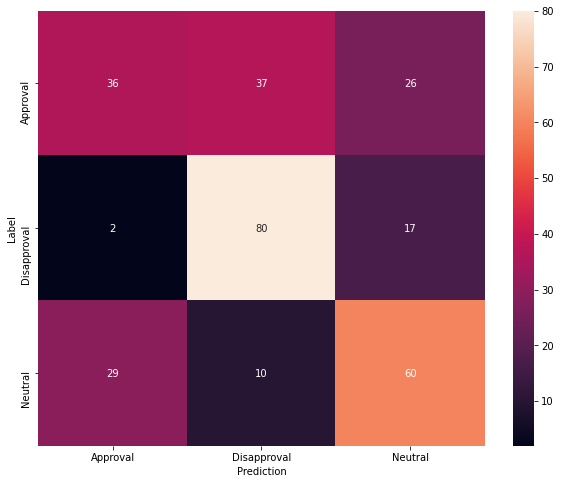

In [10]:
# confusion_mtx_atick = tf.math.confusion_matrix(y_true, y_pred) 
confusion_mtx_atick = (confusion_matrix(y_true, y_pred, normalize='true') * 100).astype('int')
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_atick, xticklabels=EMOTIONS, yticklabels=EMOTIONS, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [11]:
# ------------------ Testing on Valentina's data -----------------

y_true = test_y
y_pred = pipe.predict(test_X)

start_time = time.time()
result_valentina = classification_report(y_true, y_pred)
testing_time = time.time() - start_time

print(result_valentina)

              precision    recall  f1-score   support

         0.0       0.52      0.21      0.30      1783
         1.0       0.03      0.18      0.05       378
         2.0       0.86      0.78      0.81      7327

    accuracy                           0.65      9488
   macro avg       0.47      0.39      0.39      9488
weighted avg       0.76      0.65      0.69      9488



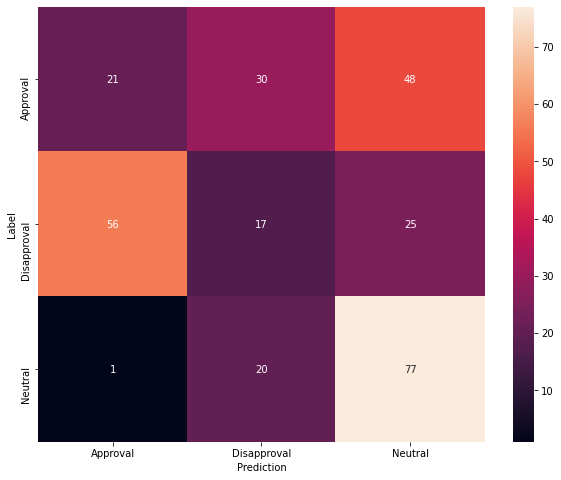

In [12]:
# confusion_mtx_valentina = tf.math.confusion_matrix(y_true, y_pred) 
confusion_mtx_valentina = (confusion_matrix(y_true, y_pred, normalize='true') * 100).astype('int')
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_valentina, xticklabels=EMOTIONS, yticklabels=EMOTIONS, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [13]:
summary = []
CONFIG['training_time'] = training_time
CONFIG['testing_time'] = testing_time
CONFIG['cm_atick'] = np.array2string(confusion_mtx_atick)
result_list_atick = result_atick.split('\n')
CONFIG['cr_atick'] = result_list_atick
CONFIG['cm_valentina'] = np.array2string(confusion_mtx_valentina)
result_list_valentina = result_valentina.split('\n')
CONFIG['cr_valentina'] = result_list_valentina

In [14]:
config = json.dumps(CONFIG, indent=4)
print(config)

{
    "timestamp": "2021-05-16 15:55:31.293294",
    "model": "SVM",
    "test_fold": "Fold 4",
    "C": 3,
    "class_weight": {
        "0": 0.71,
        "1": 2.32,
        "2": 0.86
    },
    "training_time": 4.625084400177002,
    "testing_time": 0.016312122344970703,
    "cm_atick": "[[36 37 26]\n [ 2 80 17]\n [29 10 60]]",
    "cr_atick": [
        "              precision    recall  f1-score   support",
        "",
        "         0.0       0.31      0.37      0.33       427",
        "         1.0       0.54      0.81      0.64       411",
        "         2.0       0.80      0.60      0.68      1175",
        "",
        "    accuracy                           0.59      2013",
        "   macro avg       0.55      0.59      0.55      2013",
        "weighted avg       0.64      0.59      0.60      2013",
        ""
    ],
    "cm_valentina": "[[21 30 48]\n [56 17 25]\n [ 1 20 77]]",
    "cr_valentina": [
        "              precision    recall  f1-score   support",
   

In [15]:
f = open(LOG_FILE, 'a')
f.write('\n')
f.write(config)
f.write('\n')
f.close()